In [22]:
#scienceEpics Radio Astronomy Compendium

#the fundamental unit in radio astronomy is the jansky expressed in Watts per meterSquared per Hertz
#flux density is the measure of spectral power measured by a teleescope per unit area
#write a function to take in 3 arbitrary values adn calculate the jansky.

def calcJansky(watt, area, freqs):
    # Add both the parameters and return them."
    janskys =  watt/(area*freqs);
    return janskys;

watt = 50;
meterSquaredArea = 40;
freqs = 1000;

#jansky = watt/(meterSquaredArea*freqs);

#Now write a function that takes in 3 arguments and produces the Jansky

jansky = calcJansky(watt, meterSquaredArea, freqs)

print(str(jansky) + " Jy");
print(str(jansky) + " Watts per meter squared per Hz");

#convert into mili?


0.00125 Jy
0.00125 Watts per meter squared per Hz


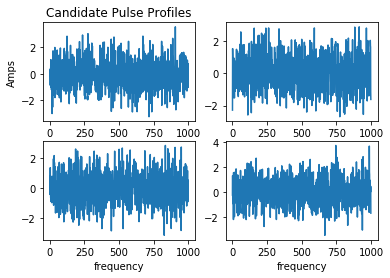

Plot of Several Datapoints. Notice that they are indistinguishable from Noise. After Several Hours of Observation.
This is what is acquired through your scope


In [23]:
#Radio Astronony is great fun. You get to listen for signals originating from distant objects in the Universe, 
#but thats the catch they are #very far away and by the time they get to us the signal is very very faint.

#stacking is usually a way to do it. Taking the mean of several signal + gaussians pushes up the pulse profile above the 
#noise floor. Improving the SNR.

#here is an example implementation of stacking

#generate a gaussian with python and put into array
import numpy as np
import matplotlib.pyplot as plt
import decimal

def plotSpectrum(Matrix):
    plt.subplot(2,2,1)
    plt.plot(Matrix[1][:])
    plt.title('Candidate Pulse Profiles')
    plt.ylabel('Amps')
    plt.xlabel('frequency')
    
    plt.subplot(2, 2, 2)
    plt.plot(Matrix[2][:])
    plt.xlabel('frequency')
    
    plt.subplot(2, 2, 3)
    plt.plot(Matrix[3][:])
    plt.xlabel('frequency')
    
    plt.subplot(2, 2, 4)
    plt.plot(Matrix[4][:])
    plt.xlabel('frequency')   
        
    plt.show()

def calcAvgSpec(Nsamps , buckets):
    Matrix = np.array([[float(0) for x in range(len(buckets))] for y in range(samps)]) #create Array
    sumBucket = np.array([0] * 1000)
    
    for p in range(0, Nsamps): #you have a list of 10 dataPoints, scale to however many datapoints
        for n in range(0,len(buckets)):
            noiseOfCosmos = np.random.normal(0,1,1000) #mean 0, std deviation 1, N number of things
            Matrix[p][n] = float(noiseOfCosmos[n] + buckets[n]) #this become decimal           
    
    plotSpectrum(Matrix)

    print("Plot of Several Datapoints. Notice that they are indistinguishable from Noise. After Several Hours of Observation.\nThis is what is acquired through your scope")
    
    sumBucket = Matrix.mean(axis = 0)    
    
    return(sumBucket)

myGaussNoise = np.random.normal(0,1,1000) #mean 0, std deviation 1, N number of things

#create an your puretone

buckets = np.array([0] * 1000) #empty array of zeroes size 1000

buckets[502] = 1.0   #artificially create signal
buckets[501] = 1.2
buckets[500] = 1.3
buckets[499] = 1.2
buckets[498] = 1.0

#add it to a signal then add the gaussian. Imagine the signal exists in the in the N = 500. Thats where the pulse exists.

dataPoint = buckets + myGaussNoise #this is one instance, not that it is still too small

#That was just an example. Now call a function that takes in Nsamp, and Signal and returns sumBucket Array

samps = 42
sumBucketArray = calcAvgSpec(samps , buckets)


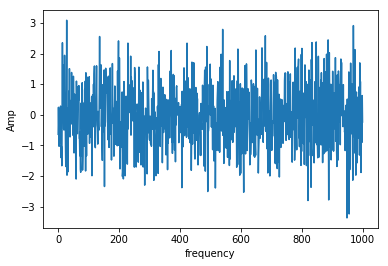

Plot of one Data Point, somewhere in there is our Signal Profile


In [24]:
import matplotlib.pyplot as plt

myGaussNoise = np.random.normal(0,1,1000) #mean 0, std deviation 1, N number of things

plt.plot(dataPoint)
plt.ylabel('Amp')
plt.xlabel('frequency')
plt.show()

print("Plot of one Data Point, somewhere in there is our Signal Profile")

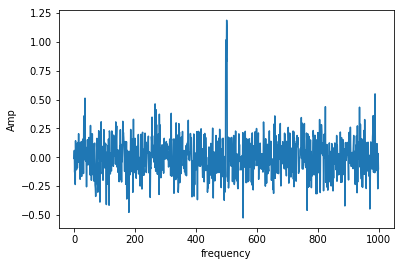

You can see that the signal now stands above the noise floor at the frequency = 500 mark


In [25]:
#this is the signal raised above the noise floor

import matplotlib.pyplot as plt

plt.plot(sumBucketArray)
plt.ylabel('Amp')
plt.xlabel('frequency')
plt.show()

print("You can see that the signal now stands above the noise floor at the frequency = 500 mark")

In [26]:
#Cool but can you work a 2D profile?
#What we demonstrated previously was on a 1D array, usually astronomical data comes in 2d images like pulsar FITs data
#shaped in 200x200 matrices

In [27]:
#for best practice, we advise the usage of numpy array because of its lower computational demand.
#Algorithms can be timed like you learned
#

#write a finction that can sum these arrays:

profile1 = np.array([[1.0,1.5,2.0],
                     [2.0,2.5,3.0],
                     [3.0,3.5,4.0]])

profile2 = np.array([[0.8,1.0,1.2],
                     [2.8,3.0,3.2],
                     [3.8,4.0,4.2]])

profile3 = np.array([[0.6,0.8,1.0],
                     [2.6,2.8,3.0],
                     [3.6,3.8,4.0]])

meanProfile = (profile1 + profile2 + profile3)/3

npMeanProf = np.mean(profile1+profile2+profile3)

meanProfile

array([[0.8       , 1.1       , 1.4       ],
       [2.46666667, 2.76666667, 3.06666667],
       [3.46666667, 3.76666667, 4.06666667]])

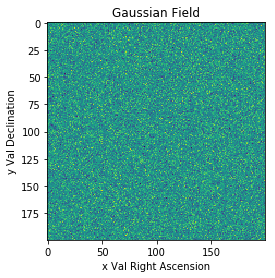

In [28]:
#now lets bring in the gaussian
#iterate though the array and fill the matrix

import matplotlib.pyplot as plt

gaussArr = np.zeros(shape=(200,200)) #roughly the size of a FITs image
storeGaussFields = [] #make it empty list
storeSignals = []

#artificially create a signal
signalArr = np.zeros(shape=(200,200))

signalArr[99][99] = 0.95
signalArr[99][100] = 0.99
signalArr[99][101] = 1.0
signalArr[100][99] = 1.3
signalArr[100][100] = 1.0
signalArr[100][101] = 1.1
signalArr[101][99] = 1.1
signalArr[101][100] = 1.1
signalArr[101][101] = 1.1
#

nSamps = 7

for z in range(0,nSamps): 
    for p in range(0,200):
        for l in range(0,200):
            gaussArr[p][l] = np.random.normal(0,1,1) #create 1 gaussian field
            profile = signalArr + gaussArr
    
    storeGaussFields.append(gaussArr)
    storeSignals.append(profile)
            
plt.imshow(profile)
plt.title('Gaussian Field')
plt.ylabel('y Val Declination')
plt.xlabel('x Val Right Ascension')
plt.show()


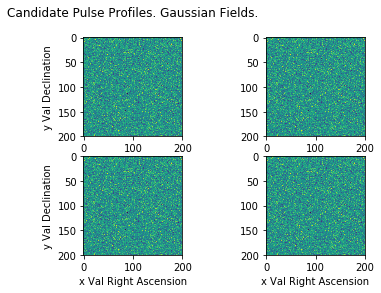

In [29]:
plt.subplot(2,2,1)
plt.imshow(storeGaussFields[0])
plt.title('Candidate Pulse Profiles. Gaussian Fields.\n')
plt.ylabel('y Val Declination')

plt.subplot(2, 2, 2)
plt.imshow(storeGaussFields[1])

plt.subplot(2, 2, 3)
plt.imshow(storeGaussFields[2])
plt.ylabel('y Val Declination')
plt.xlabel('x Val Right Ascension')

plt.subplot(2, 2, 4)
plt.imshow(storeGaussFields[3])
plt.xlabel('x Val Right Ascension')

plt.show()

In [30]:
#signal Averager

meanProf = 0;

for l in range(0,len(storeSignals)):
    meanProf += (storeSignals[l])
    if l == len(storeSignals): #on the last iteration divide
        meanProf = meanProf/len(storeSignals)


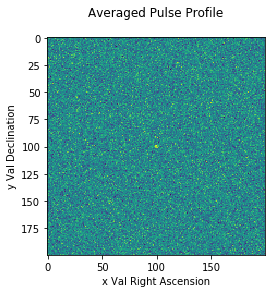

Twinkle twinkle little star


In [31]:
plt.imshow(meanProf)
plt.title('Averaged Pulse Profile\n')
plt.ylabel('y Val Declination')
plt.xlabel('x Val Right Ascension')
plt.show()

print("Twinkle twinkle little star")

In [32]:
#we can scale more iterations to get more accurate.

In [487]:
#Lets say we wanted to find the location of the highest

In [488]:
# back of the envelope calculations
# Memory of calculations = N data x (N pixels) x (N bytes per pixel) = N bytes

In [489]:
#binApprox Algorithm